In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *

In [2]:
MPRA_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_760679.tsv', sep='\t')
MPRA_df

,seq,ID,chr,pos,ref_allele,alt_allele,allele,OL,data_project,K562,HepG2,SK-N-SH,HCT116,A549
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:A:wC,chr1,14677,G,A,alt,OL41_42,GTEx,0.018,-0.048,0.017,-0.708,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,1:14677:G:A:R:wC,chr1,14677,G,A,ref,OL41_42,GTEx,-1.043,0.191,0.099,-0.262,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:A:wC,chr1,63697,T,C,alt,OL41_42,GTEx,-1.005,0.650,-0.185,0.627,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,1:63697:T:C:R:wC,chr1,63697,T,C,ref,OL41_42,GTEx,-0.779,0.762,0.281,0.676,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,1:64764:C:T:R:wC,chr1,64764,C,T,ref,OL41_42,GTEx,-0.455,-0.643,0.066,-0.164,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760674,CTGCATCTGTGCAGCCTGGCAGCGGCGGCGCTGCGCTGTGACATTT...,Y:15815629:NA:NA,chrY,15815629,NaN,NaN,NaN,OL15,OL15,0.716,1.309,1.089,NaN,NaN
760675,GCACTTCACATTTGTTTTTAGGGTTACATAGTCTACTCTGTATCCT...,Y:21740684:NA:NA,chrY,21740684,NaN,NaN,NaN,OL15,OL15,-0.708,-0.544,-0.427,NaN,NaN
760676,TGTTCAAGTGGCCACAGGGTTACTTGCTTTAGCATGGCTCCTTGGC...,Y:21740884:NA:NA,chrY,21740884,NaN,NaN,NaN,OL15,OL15,-0.143,-0.195,-0.308,NaN,NaN
760677,TAATTAGTTGGGAAGGTTCAGGTTCTGGGACATCCGTTGCTATTTC...,Y:21741084:NA:NA,chrY,21741084,NaN,NaN,NaN,OL15,OL15,-0.116,-0.084,-0.385,NaN,NaN


In [3]:
# VEF_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_AG_VEF_scalelog1pmean1.tsv', sep='\t')
VEF_df = pd.read_csv('../data/Gosai_MPRA/Gosai_MPRA_Sei_VEF_zscore.tsv', sep='\t')
VEF_df.describe()

,K562_DNase,K562_H3K4me3,K562_H3K27ac,K562_H3K27me3,K562_H3K4me1,K562_H3K36me3,K562_H3K9me3,K562_CTCF,HepG2_DNase,HepG2_H3K4me3,HepG2_H3K27ac,HepG2_H3K27me3,HepG2_H3K4me1,HepG2_H3K36me3,HepG2_H3K9me3,HepG2_CTCF,SK-N-SH_DNase,SK-N-SH_H3K4me3,SK-N-SH_H3K27ac,SK-N-SH_H3K27me3,SK-N-SH_H3K4me1,SK-N-SH_H3K36me3,SK-N-SH_H3K9me3,SK-N-SH_CTCF,HCT116_DNase,HCT116_H3K4me3,HCT116_H3K27ac,HCT116_H3K27me3,HCT116_H3K4me1,HCT116_H3K36me3,HCT116_H3K9me3,HCT116_CTCF,A549_DNase,A549_H3K4me3,A549_H3K27ac,A549_H3K27me3,A549_H3K4me1,A549_H3K36me3,A549_H3K9me3,A549_CTCF
count,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,760679.000,760679.000,760679.000,0.000,760679.000,0.000,760679.000,760679.000
mean,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,NaN,0.000,-0.000,-0.000,0.000,-0.000,NaN,-0.000,NaN,-0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,NaN,-0.000,0.000,-0.000,0.000,NaN,-0.000,NaN,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000,1.000,1.000,1.000,1.000,1.000,NaN,1.000,1.000,1.000,1.000,NaN,1.000,NaN,1.000,1.000
min,-3.071,-4.178,-4.665,-5.994,-5.530,-2.963,-1.741,-2.223,-2.539,-3.762,-4.128,-4.924,-4.987,-2.823,NaN,-2.453,-3.506,-4.290,-4.320,-3.525,NaN,-3.342,NaN,-2.462,-3.177,-2.987,-4.315,-3.715,-2.924,-2.844,NaN,-2.212,-3.474,-2.917,-3.403,NaN,-4.443,NaN,-3.275,-2.586
25%,-0.706,-0.689,-0.697,-0.625,-0.686,-0.747,-0.818,-0.673,-0.734,-0.721,-0.702,-0.700,-0.680,-0.782,NaN,-0.691,-0.682,-0.656,-0.645,-0.771,NaN,-0.782,NaN,-0.672,-0.687,-0.701,-0.686,-0.592,-0.721,-0.736,NaN,-0.627,-0.694,-0.677,-0.676,NaN,-0.692,NaN,-0.725,-0.677
50%,-0.202,-0.208,-0.205,-0.039,-0.102,-0.115,-0.316,-0.253,-0.210,-0.234,-0.183,-0.130,-0.071,-0.168,NaN,-0.212,-0.233,-0.248,-0.241,-0.136,NaN,-0.044,NaN,-0.240,-0.191,-0.259,-0.232,-0.175,-0.249,-0.159,NaN,-0.259,-0.145,-0.264,-0.243,NaN,-0.215,NaN,-0.193,-0.221
75%,0.493,0.481,0.495,0.573,0.594,0.641,0.613,0.392,0.543,0.525,0.527,0.636,0.626,0.658,NaN,0.467,0.483,0.388,0.380,0.700,NaN,0.754,NaN,0.412,0.456,0.444,0.448,0.361,0.493,0.619,NaN,0.317,0.497,0.395,0.423,NaN,0.512,NaN,0.561,0.420
max,6.455,5.184,5.623,6.448,4.656,4.533,3.655,8.456,5.766,6.191,6.044,4.098,4.231,4.624,NaN,8.384,5.613,6.558,6.388,4.103,NaN,4.445,NaN,8.475,7.113,6.104,7.072,6.734,4.692,4.500,NaN,9.919,6.630,6.189,6.035,NaN,4.868,NaN,6.659,8.890


In [4]:
cell_types = ['K562', 'HepG2', 'SK-N-SH', 'HCT116', 'A549']
assays = ['DNase', 'H3K4me3', 'H3K27ac', 'CTCF']

In [5]:
data_split_dict = {}

data_split_dict['total'] = np.ones(len(MPRA_df), dtype=bool)
data_split_dict['train'] = MPRA_df['chr'].isin([f'chr{i}' for i in (list(range(3, 23)) + ['X', 'Y'])])
data_split_dict['valid'] = MPRA_df['chr'].isin(['chr1'])
data_split_dict['test']  = MPRA_df['chr'].isin(['chr2'])

# MPRA_df['std'] = MPRA_df[cell_types].std(axis=1, skipna=True)
# threshold = np.percentile(MPRA_df['std'].dropna(), 95)
# data_split_dict['diff']  = MPRA_df['std'] > threshold
# data_split_dict['const'] = ~data_split_dict['diff']


for cell_type in cell_types:
    ref_mean = MPRA_df[cell_types[:3]].mean(axis=1)
    # 与前三种 cell type 平均值的绝对差
    diff = (MPRA_df[cell_type] - ref_mean).abs()
    # 计算差值的 95 百分位阈值（取前 5%）
    threshold = np.percentile(diff.dropna(), 95)
    # 标记该 cell type 特异性的序列
    data_split_dict[f'{cell_type}_specific'] = diff > threshold


for key in data_split_dict:
    print(key, data_split_dict[key].sum())

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}+{k2}'] = data_split_dict[k1] & data_split_dict[k2]

total 760679
train 631073
valid 70952
test 58654
K562_specific 38034
HepG2_specific 38034
SK-N-SH_specific 38034
HCT116_specific 22406
A549_specific 15975


=== K562 ===
   bin  DNase H3K4me3 H3K27ac   CTCF
0    0 -0.055  -0.040   0.025 -0.047
1    1 -0.015   0.030   0.094 -0.044
2    2 -0.001   0.019   0.083 -0.043
3    3 -0.007   0.025   0.081 -0.059
4    4 -0.012   0.033   0.080 -0.074
5    5  0.001   0.032   0.072 -0.083
6    6  0.005   0.018   0.054 -0.098
7    7  0.007   0.017   0.057 -0.103
8    8  0.010   0.011   0.051 -0.103
9    9  0.007  -0.008   0.036 -0.124
10  10  0.011  -0.009   0.032 -0.126
11  11  0.012  -0.023   0.022 -0.127
12  12  0.012  -0.030   0.010 -0.131
13  13  0.030  -0.047  -0.003 -0.128
14  14  0.021  -0.065  -0.025 -0.140
15  15  0.049  -0.067  -0.023 -0.150
16  16  0.057  -0.080  -0.044 -0.146
17  17  0.075  -0.089  -0.048 -0.167
18  18  0.151  -0.029  -0.018 -0.155
19  19  0.451   0.306   0.212 -0.098


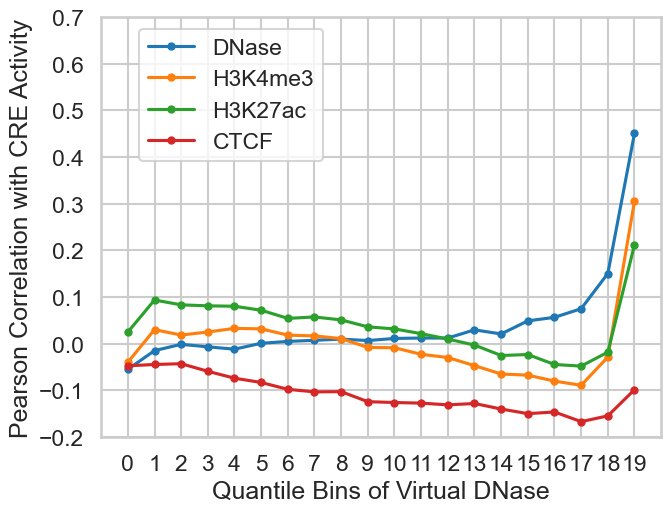

=== K562 ===
   bin  DNase H3K4me3 H3K27ac   CTCF
0    0 -0.065  -0.059   0.033 -0.036
1    1 -0.031  -0.012   0.108 -0.041
2    2 -0.005   0.000   0.096 -0.044
3    3  0.004  -0.003   0.092 -0.043
4    4  0.020   0.001   0.081 -0.049
5    5  0.034  -0.008   0.080 -0.043
6    6  0.068   0.001   0.066 -0.038
7    7  0.073  -0.002   0.083 -0.042
8    8  0.104   0.003   0.082 -0.028
9    9  0.146   0.016   0.084 -0.005
10  10  0.171   0.011   0.080  0.011
11  11  0.201   0.021   0.099  0.021
12  12  0.243   0.033   0.101  0.045
13  13  0.272   0.025   0.134  0.044
14  14  0.308   0.031   0.134  0.069
15  15  0.355   0.034   0.141  0.099
16  16  0.400   0.048   0.151  0.124
17  17  0.431   0.062   0.170  0.117
18  18  0.482   0.116   0.152  0.082
19  19  0.609   0.414   0.311  0.104


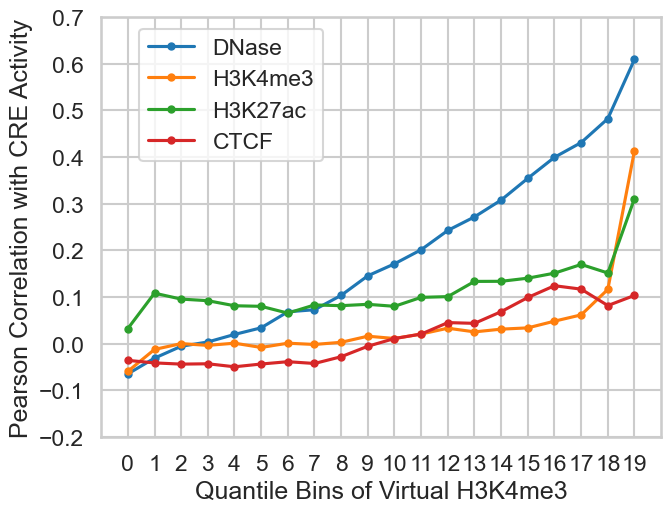

=== K562 ===
   bin  DNase H3K4me3 H3K27ac   CTCF
0    0 -0.122  -0.116  -0.026 -0.127
1    1 -0.073  -0.087   0.011 -0.093
2    2 -0.040  -0.063   0.005 -0.074
3    3 -0.033  -0.049  -0.001 -0.066
4    4 -0.022  -0.049   0.008 -0.054
5    5  0.003  -0.028  -0.000 -0.052
6    6  0.044  -0.009   0.010 -0.023
7    7  0.064  -0.009   0.006 -0.015
8    8  0.105   0.007   0.008  0.005
9    9  0.130   0.017   0.019  0.002
10  10  0.161   0.024   0.010  0.018
11  11  0.207   0.029   0.012  0.060
12  12  0.231   0.036   0.020  0.066
13  13  0.278   0.033   0.017  0.093
14  14  0.330   0.045   0.027  0.134
15  15  0.366   0.054   0.040  0.149
16  16  0.395   0.071   0.051  0.155
17  17  0.446   0.114   0.070  0.159
18  18  0.494   0.166   0.116  0.140
19  19  0.587   0.404   0.345  0.176


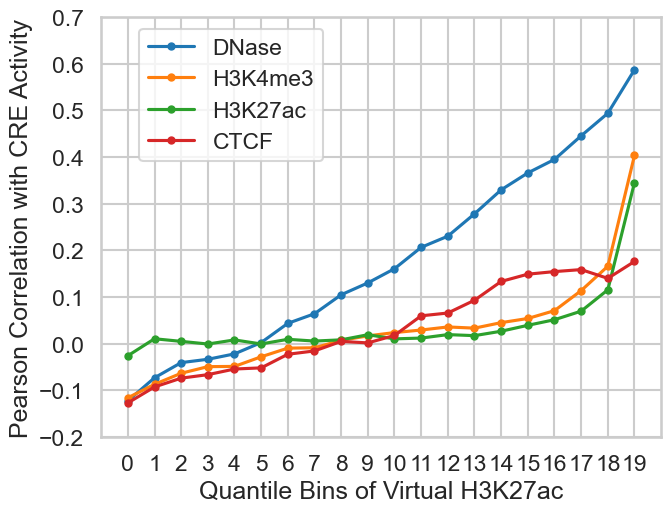

=== K562 ===
   bin  DNase H3K4me3 H3K27ac   CTCF
0    0 -0.007   0.003   0.026 -0.048
1    1  0.034   0.059   0.102 -0.011
2    2  0.062   0.074   0.107 -0.010
3    3  0.090   0.097   0.122 -0.007
4    4  0.116   0.112   0.134 -0.000
5    5  0.129   0.132   0.147  0.000
6    6  0.171   0.154   0.167  0.002
7    7  0.209   0.167   0.185  0.017
8    8  0.240   0.190   0.211  0.011
9    9  0.267   0.205   0.219  0.006
10  10  0.312   0.236   0.248  0.009
11  11  0.348   0.257   0.271  0.007
12  12  0.387   0.270   0.287  0.018
13  13  0.446   0.301   0.325  0.017
14  14  0.471   0.320   0.340  0.037
15  15  0.501   0.340   0.363  0.026
16  16  0.550   0.379   0.392  0.050
17  17  0.596   0.422   0.430  0.057
18  18  0.667   0.509   0.505  0.103
19  19  0.649   0.510   0.498  0.113


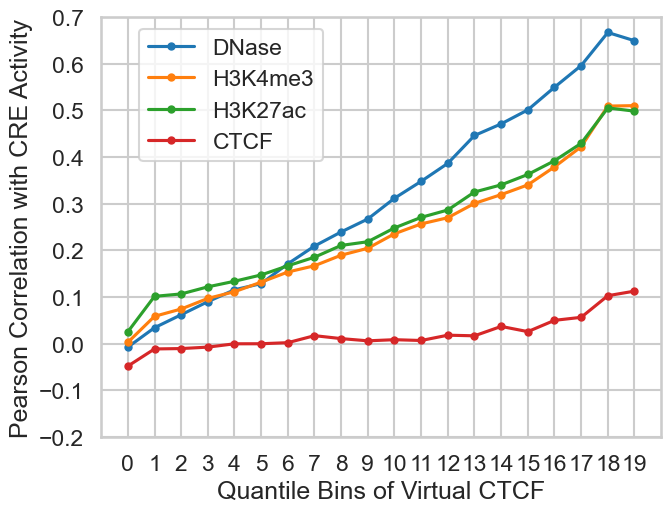

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

n_bins = 20

for cell_type in cell_types[:1]:
    for assay in assays:
        
        bin_df = pd.qcut(VEF_df[f'{cell_type}_{assay}'], q=n_bins, labels=False)

        # thresholds = [0, 0.2, 0.4, 0.6, 0.8, 1.0, np.inf]
        # n_bins = len(thresholds)
        # bin_df = pd.cut(VEF_df[f'{cell_type}_{assay}'], bins=thresholds, labels=False, include_lowest=True)

        pearson_per_bin = pd.DataFrame(index=np.arange(n_bins), columns=['bin', 'DNase', 'H3K4me3', 'H3K27ac', 'CTCF'])

        for i in range(n_bins):
            condition = (bin_df == i)

            x = VEF_df.loc[condition, f'{cell_type}_DNase']
            y = MPRA_df.loc[condition, f'{cell_type}']
            r1 = pearson(x, y)[0]

            x = VEF_df.loc[condition, f'{cell_type}_H3K4me3']
            y = MPRA_df.loc[condition, f'{cell_type}']
            r2 = pearson(x, y)[0]

            x = VEF_df.loc[condition, f'{cell_type}_H3K27ac']
            y = MPRA_df.loc[condition, f'{cell_type}']
            r3 = pearson(x, y)[0]

            x = VEF_df.loc[condition, f'{cell_type}_CTCF']
            y = MPRA_df.loc[condition, f'{cell_type}']
            r4 = pearson(x, y)[0]

            pearson_per_bin.loc[i] = [i, r1, r2, r3, r4]

        print(f'=== {cell_type} ===')
        print(pearson_per_bin)

        sns.set_theme(context='talk', style="whitegrid")
        fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
        plt.subplots_adjust(left=0.2, bottom=0.2, right=0.9, top=0.9)

        for i, a2 in enumerate(assays):
            plt.plot(np.arange(n_bins), pearson_per_bin[a2], marker='o', label=assays[i], color=tab20_colors[i*2], markersize=5)

        ax.set_xlabel(f'Quantile Bins of Virtual {assay}')
        ax.set_ylabel(f'Pearson Correlation with CRE Activity')
        ax.set_xlim(-1, n_bins)
        ax.set_ylim(-0.2, 0.7)
        ax.set_xticks(np.arange(n_bins))
        ax.set_xticklabels(np.arange(n_bins))
        ax.legend(bbox_to_anchor=(0, 0.7), bbox_transform=ax.transData, loc="upper left")

        plt.savefig(f'figures/Gosai_MPRA_AG_{cell_type}_{assay}_bin_correlation.png', dpi=400)
        plt.savefig(f'figures_pdf/Gosai_MPRA_AG_{cell_type}_{assay}_bin_correlation.pdf', dpi=400)
        plt.show()